# Field inference

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc
import seaborn as sns

In [17]:
sns.set_theme(context='paper', font= 'Serif', style = 'ticks')

In [31]:
a = 9.5
g = 20
d = 0.1
alpha = 20

time_step = 0.01
total_time = 100

time_arr = np.arange(0,total_time,time_step)

In [32]:
a_bar = a/(2*np.pi)
g_bar = g/(2*np.pi)

In [33]:
def set_initial_states(initial_value, initial_time_period, field_arr):
    initial_step = int(initial_time_period//time_step)
    field_arr[-initial_step:] = initial_value
    return field_arr

def field_avg_over_tau(field_arr, t, tau):
    steps = int(tau//time_step)
    ind = int(t//time_step)
    return np.average(field_arr[np.r_[ind-steps:ind]])

In [34]:
# epsilon = 0.00
tau = 1
e_0 = a_bar/(1 + g_bar)

initial_e = e_0 + 0.1
epsilon = initial_e - e_0

field_arr = np.zeros_like(time_arr)
field_arr = set_initial_states(initial_e, d, field_arr)

reset_time = 0 #last moment when e touched the ground

In [35]:
for ind,t in enumerate(time_arr):
    field_arr[ind] = a_bar - g_bar * field_avg_over_tau(field_arr, t - d, tau)

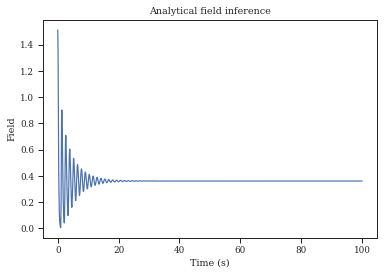

In [36]:
fig = plt.figure()
ax = fig.add_subplot()

ax.set_title('Analytical field inference')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Field')

ax.plot(time_arr, field_arr)

# Phase diagram

In [9]:
time_step = 0.01
total_time = 5

time_arr = np.arange(0.01,total_time,time_step)

In [10]:
g_arr = np.arange(0.1,15.1,0.5)
delay_arr = np.arange(0.1,2,0.1)
sigma_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]))
mean_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]))
check_arr = np.zeros((g_arr.shape[0], delay_arr.shape[0]), dtype = bool)

In [13]:
for i,g in enumerate(g_arr):
    for j,d in enumerate(delay_arr):
        field_arr = np.zeros_like(time_arr)
        e_0 = a/(2*np.pi + g)
        g_bar = g/(2*np.pi)

        initial_e = e_0 + 0.1
        epsilon = initial_e - e_0
        
        for ind,t in enumerate(time_arr):
            field_arr[ind] = a_bar - g_bar * field_avg_over_tau(field_arr, t - d, tau)
        
        
        last_ind = 100
        sigma_arr[i,j] = np.std(field_arr[-last_ind:])
        mean_arr[i,j] = np.mean(field_arr[-last_ind:])
#         if True in field_arr> initial_e: check_arr[i,j] = True



<AxesSubplot:>

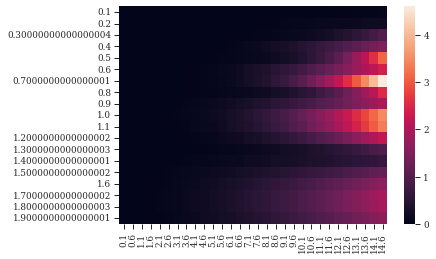

In [14]:
sns.heatmap((sigma_arr.T), xticklabels=g_arr, yticklabels=delay_arr)

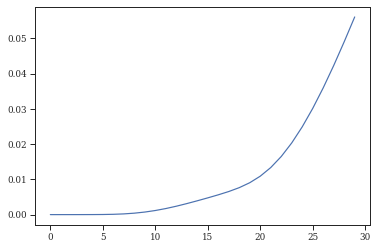

In [15]:
plt.plot( sigma_arr.T[0] )

In [ ]:
sns.heatmap(check_arr*1, xticklabels=g_arr, yticklabels=delay_arr)